## 6.4.1数字图像基础
&emsp;&emsp;数字图像是由有限个像素(Pixe)组成的，以两维数组或矩阵形式保存，主要用图像分辨率和灰度级来描述，图像格式主要包括BMP、GIF、JPEG、PNG等。

&emsp;&emsp;数字图像主要分为二值图像、灰度图像和彩色图像。
- 二值图像的取值只有0、1两种，“0”代表黑色，“1”代白色；
- 灰度图像的取值一般为0~255的整数，“0”表示纯黑色，“255”表示纯白色(如图6-3-5)；
- 彩色图像模型有RGB模型、HSV模型、CMYK模型和YCrCb模型等几种，相互之间可以转换，其中的RGB模型的每个像素是由R、G、B三种分量组成，因此需要三个二维数组来存储。

&emsp;&emsp;Python提供了用于数字图像处理的开源库，包括PIL/ Pillow、CV2、Matplotlib、scikit-image等。PIL(Python Imaging Library)是Python的标准库(只支持到Python 2.7)，使用简单且提供了基本的图像处理功能，Pillow是PIL的一个分支(最新版本8.0.1)，可以支持到Python 3.9；CV2是OpenCV的Python版，功能强大应用广泛，读入图像的默认顺序为BGR；Matplotlib是Python中类似Matlab的2D绘图库；scikit-image是基于scipy的将图片作为numpy数组来处理的一个Python图像处理库。

### 1. 图像读写和显示

&emsp;&emsp;**例6-4-1** 利用Pillow库，实现图像文件的读写和显示等基本操作。注意：为便于程序运行，请将素材文件“配套资源\第6章\lena.jpg”复制到源文件（.py文件或.ipynb文件）所在的路径下。

In [1]:
#导入Pillow库
from PIL import Image

In [2]:
#读入图像lena.jpg
im = Image.open('lena.jpg')

In [3]:
#显示该图像的基本信息
print('图像的尺寸为：', im.size)
print('图像的宽度为：', im.width)
print('图像的高度为：', im.height)
print('图像的格式为：', im.format)
print('图像的模式为：', im.mode)

图像的尺寸为： (512, 512)
图像的宽度为： 512
图像的高度为： 512
图像的格式为： JPEG
图像的模式为： RGB


In [10]:
#显示图像
im.show()

In [11]:
#保存图像
im.save('lena.bmp')

In [12]:
#图像模式转换
new_im_1 = im.convert("1")
print('图像new_im_1的模式为：', new_im_1.mode)
new_im_1.show()
new_im_L = im.convert("L")
print('图像new_im_L的模式为：', new_im_L.mode)
new_im_L.show()

图像new_im_1的模式为： 1
图像new_im_L的模式为： L


&emsp;&emsp;该段代码首先通过import导入Pillow库，然后通过Image.open()函数读入图像lena.jpg，并显示该图像的宽度、高度、格式和模式等基本信息，由此可知该图是尺寸为(512, 512)的RGB模式的JPEG格式图像，显示该图像（如图6-4-1（a））并用save()函数以lena.bmp保存，可以通过convert()函数将RGB彩色图像转换为二值图像和灰度图像。
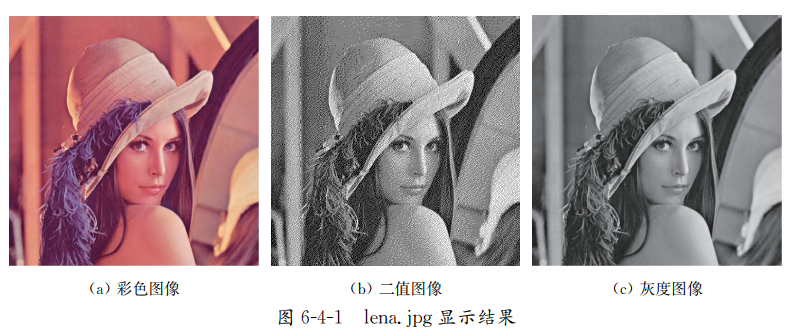

### 2. 图像颜色通道
&emsp;&emsp;**例6-4-2** 利用Pillow库，实现图像的颜色信息输出。

In [1]:
#导入Pillow库
from PIL import Image

In [2]:
#读入图像lena.jpg
im = Image.open('lena.jpg')

#### （1）分离合并颜色通道
&emsp;&emsp;该段代码是在通过Pillow的Image.open()函数读入图像lena.jpg后利用split()函数将图像的R, G, B三个通道分离，用merge()函数将分离后的各通道数据合并，并显示最终的合并图像。

In [3]:
#（1）分离合并颜色通道
R, G, B = im.split()
im_merge = Image.merge('RGB',(R, G, B))
im_merge.show()

####  （2）获取特定像素的颜色值
&emsp;&emsp;通过getpixel()函数获取指定位置的像素值，由程序结果可知，在原始图像im和三通道合并后图像的相同位置的像素值是相同的，而每个通道的相应位置的值也与三通道图像一致。

In [4]:
#（2）获取特定像素的颜色值
print(im.getpixel((0,0)))
print(R.getpixel((0,0)),G.getpixel((0,0)),B.getpixel((0,0)))
print(im_merge.getpixel((0,0)))
print(im.getpixel((100,50)))
print(R.getpixel((100,50)),G.getpixel((100,50)),B.getpixel((100,50)))
print(im_merge.getpixel((100,50)))

(228, 135, 128)
228 135 128
(228, 135, 128)
(180, 70, 81)
180 70 81
(180, 70, 81)


### 3. 图像基本操作
&emsp;&emsp;**例6-4-3** 利用Pillow库，实现图像旋转、大小调整、剪切、滤波等基本操作。

#### （1）导入Pillow库
&emsp;&emsp;该段代码是在通过Pillow的Image和ImageFilter模块，在代码段（3）中会用到图像滤波。

In [1]:
#（1）导入Pillow库
from PIL import Image, ImageFilter     
#读入图像lena.jpg
im = Image.open('lena.jpg')

#### （2）图像旋转、大小调整、剪切
&emsp;&emsp;如图6-4-2所示，通过rotate ()函数对图像进行逆时针方向按照给定角度的旋转，本例是逆时针旋转90的图像；resize()函数是重新定义图像的尺寸，如本例中将原始图像重置为(300, 300)的图像；crop()函数获取当前图像由box定义一个四元组的矩形区域的子图像，其中，box = (50,50,200,200)表示左、上、右和下的像素坐标，该子图像的尺寸为(150, 150)。

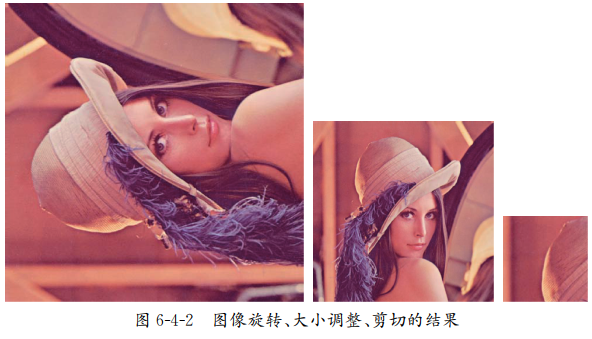

In [2]:
#（2）图像旋转、大小调整、剪切
im_90 = im.rotate(90)
im_90.show()
#重新设定图像大小
im_resize = im.resize((300, 300))   
print('图像im_resize的尺寸为：', im_resize.size)
im_resize.show()
box = (50,50,200,200)
im_crop = im.crop(box)
print('图像im_crop的尺寸为：', im_crop.size)
im_crop.show()

图像im_resize的尺寸为： (300, 300)
图像im_crop的尺寸为： (150, 150)


#### （3）图像滤波
&emsp;&emsp;ImageFilter模块主要是对图像进行滤波，并提供了多个滤波器：BLUR、CONTOUR、EDGE_ENHANCE、FIND_EDGES、SHARPEN、SMOOTH等，本例通过利用BLUR方法对图像进行均值滤波，CONTOUR方法获取图像的轮廓，如图6-4-3所示。

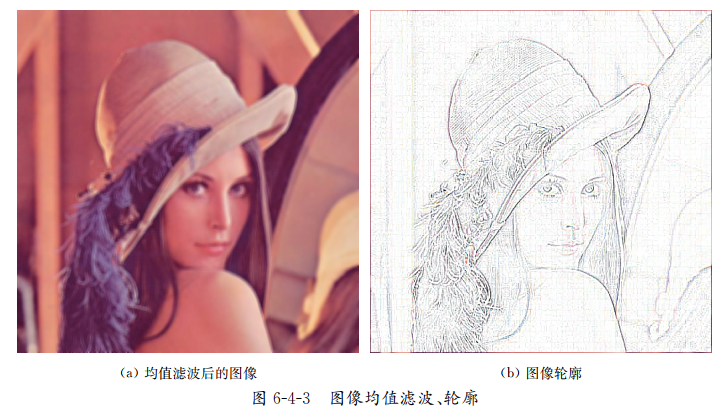

In [3]:
#（3）图像滤波
im_BLUR = im.filter(ImageFilter.BLUR)  
im_BLUR.show()
im_CONTOUR = im.filter(ImageFilter.CONTOUR)  
im_CONTOUR.show()